In [1]:
from IPython.display import HTML, display
display(HTML('<style>.container {width:70% !important}</style>'))

## **ABOUT**
- **This is an exploration exercise of a layoff dataset with information on layoffs across several industries and companies over the span of 3 years**
- **In this exercise, an exploration was be carried out to find industries with the most amount of layoffs and industries with the least amount of layoffs**
- **The time frame starts at March, 2020 and ends March, 2023.**



### Procedures
- **For this exercise, I clean the dataset by handling null values, removing duplicate data, assigning proper data types to columns.**
- **Explain various quantities with some basic statistics.**
- **Checked the distribution of the data and identified outliers.**
- **Created graphs visualization for quick understanding.**
- **Checked for correlations between columns.**

**Overall this is a fun simple exercise using pandas and some visualization libraries.** 

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#silencing all the warning messages that appear with the output
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading the dataset into notebook
data = pd.read_csv('layoffs.csv')
data.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,Unknown,Brazil,788.0


In [5]:
#brief overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                2361 non-null   object 
 1   location               2361 non-null   object 
 2   industry               2357 non-null   object 
 3   total_laid_off         1621 non-null   float64
 4   percentage_laid_off    1576 non-null   float64
 5   date                   2360 non-null   object 
 6   stage                  2355 non-null   object 
 7   country                2361 non-null   object 
 8   funds_raised_millions  2152 non-null   float64
dtypes: float64(3), object(6)
memory usage: 166.1+ KB


**Observation_________**
<br><br>

- **There are a total of 2361 rows and 9 columns**
- **6 columns out of 8 columns have missing values**
- **Total numeric columns are 3**
- **Total object (string) columns are 6**
- **The date column should be date and not object (str) datatype**

In [6]:
#some brief statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_laid_off,1621.0,238.358421,769.718801,3.0,36.0,80.00,180.0,12000.0
percentage_laid_off,1576.0,0.257917,0.255575,0.0,0.1,0.17,0.3,1.0
funds_raised_millions,2152.0,822.454134,5593.961626,0.0,50.0,156.50,445.0,121900.0


**Observation_________**
<br> <br>
- **The mean value of people laid off is 238. However, this value is affected by larger max values (outliers), indicating a right skewed distribution.**
- **The maximum percentage laid off is 1 (100%). Meaning some companies went completely out of business.**
- **For funds raised, the minimum value is 0. Some companies were likely acquired early, or were funded with company revenue or in the worse case scenario, had some difficulty securing funds**

### Closer inspection of the above observations

In [37]:
#checking the top 5 largest number of layoffs 
cols = ['company', 'location', 'industry', 'total_laid_off', 'percentage_laid_off', 'date', 'stage', 'country', 'funds_raised_millions']

high_layoffs = data[cols].sort_values(by = 'total_laid_off', ascending = False).nlargest(10, 'total_laid_off')
high_layoffs

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
281,Google,SF Bay Area,Consumer,12000.0,0.06,2023-01-20,Post-IPO,United States,26.0
749,Meta,SF Bay Area,Consumer,11000.0,0.13,2022-11-09,Post-IPO,United States,26000.0
314,Microsoft,Seattle,Other,10000.0,0.05,2023-01-18,Post-IPO,United States,1.0
681,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16,Post-IPO,United States,108.0
39,Ericsson,Stockholm,Other,8500.0,0.08,2023-02-24,Post-IPO,Sweden,663.0
453,Amazon,Seattle,Retail,8000.0,0.02,2023-01-04,Post-IPO,United States,108.0
454,Salesforce,SF Bay Area,Sales,8000.0,0.10,2023-01-04,Post-IPO,United States,65.0
148,Dell,Austin,Hardware,6650.0,0.05,2023-02-06,Post-IPO,United States,NaN
210,Philips,Amsterdam,Healthcare,6000.0,0.13,2023-01-30,Post-IPO,Netherlands,NaN
1780,Booking.com,Amsterdam,Travel,4375.0,0.25,2020-07-30,Acquired,Netherlands,NaN


**Observation_________**
<br> <br>
- The top 5 companies with the highest number of layoffs in this dataset (in ascending order) are Ericsson, Microsoft, Amazon, Meta, and Google.
- Between late 2022 and early 2023 both Microsoft and Amazon both located in **Seattle** were responsible for a total of 20000 layoffs. In a similar time frame,  the companies Meta and Google both located in **SF Bay Area** are responsible for a total of 23000 layoffs.
- The company with the highest number of layoffs is Google at 12000 layoffs in the time frame of January 20th, 2023.



**The largest 5 layoff values in this dataset range from 8500 to 10000. Showing the large variation in layoffs**


### Checking for duplicates

In [7]:
duplicates = data[data.duplicated()]
duplicates

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
1492,Cazoo,London,Transportation,750.0,0.15,2022-06-07,Post-IPO,United Kingdom,2000.0
2357,Yahoo,SF Bay Area,Consumer,1600.0,0.20,2023-02-09,Acquired,United States,6.0
2358,Hibob,Tel Aviv,HR,70.0,0.30,2020-03-30,Series A,Israel,45.0
2359,Casper,New York City,Retail,NaN,NaN,2021-09-14,Post-IPO,United States,339.0
2360,Wildlife Studios,Sao Paulo,Consumer,300.0,0.20,2022-11-28,Unknown,Brazil,260.0


**There are 5 entries where all column data are duplicates.**

In [8]:
#viewing duplicates
data[data['company'].isin(duplicates['company'])].sort_values(by = 'total_laid_off')

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
2254,Hibob,Tel Aviv,HR,70.0,0.30,2020-03-30,Series A,Israel,45.0
2358,Hibob,Tel Aviv,HR,70.0,0.30,2020-03-30,Series A,Israel,45.0
2022,Casper,New York City,Retail,78.0,0.21,2020-04-21,Post-IPO,United States,339.0
625,Wildlife Studios,Sao Paulo,Consumer,300.0,0.20,2022-11-28,Unknown,Brazil,260.0
2360,Wildlife Studios,Sao Paulo,Consumer,300.0,0.20,2022-11-28,Unknown,Brazil,260.0
1491,Cazoo,London,Transportation,750.0,0.15,2022-06-07,Post-IPO,United Kingdom,2000.0
1492,Cazoo,London,Transportation,750.0,0.15,2022-06-07,Post-IPO,United Kingdom,2000.0
118,Yahoo,SF Bay Area,Consumer,1600.0,0.20,2023-02-09,Acquired,United States,6.0
2357,Yahoo,SF Bay Area,Consumer,1600.0,0.20,2023-02-09,Acquired,United States,6.0
332,Cazoo,London,Transportation,NaN,NaN,2023-01-18,Post-IPO,United Kingdom,2000.0


In [9]:
# Drop duplicates 
data.drop_duplicates(keep='first', inplace=True)

# Reset index 
data.reset_index(drop=True, inplace=True)


In [10]:
data[data.duplicated()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions


Duplicates have been dropped

In [11]:
#function to display all entries in a pandas dataframe without cropping
def display_all(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        return print(df.to_markdown(index = False))

In [12]:
#Looking into companies with percentage_laid_off of 1%
company_shutdown = data[data['percentage_laid_off'] == 1]
display_all(company_shutdown)

| company             | location         | industry       |   total_laid_off |   percentage_laid_off | date       | stage          | country              |   funds_raised_millions |
|:--------------------|:-----------------|:---------------|-----------------:|----------------------:|:-----------|:---------------|:---------------------|------------------------:|
| Kandela             | Los Angeles      | Consumer       |              nan |                     1 | 2023-03-02 | Acquired       | United States        |                nan      |
| DUX Education       | Bengaluru        | Education      |              nan |                     1 | 2023-02-28 | Unknown        | India                |                nan      |
| Locomation          | Pittsburgh       | Transportation |              nan |                     1 | 2023-02-22 | Seed           | United States        |                 57      |
| Fipola              | Chennai          | Food           |              nan |            

In [13]:
company_shutdown['company'].count()

116

**Observation_________**
<br> <br>
- All companies above - total of 116, went out of business.

In [14]:
#checking out companies where funds raised equals 0
data.loc[data['funds_raised_millions'] == 0]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
809,BitMEX,Non-U.S.,Crypto,NaN,0.30,2022-11-02,Seed,Seychelles,0.0
1327,Chessable,London,Consumer,29.0,NaN,2022-07-04,Acquired,United Kingdom,0.0
1420,SuperLearn,Bengaluru,Education,NaN,1.00,2022-06-21,Seed,India,0.0
1601,divvyDOSE,Davenport,Healthcare,62.0,NaN,2022-05-06,Acquired,United States,0.0
1641,BitMEX,Non-U.S.,Crypto,75.0,0.25,2022-04-04,Seed,Seychelles,0.0
2327,Drip,Salt Lake City,Marketing,20.0,NaN,2020-03-23,Acquired,United States,0.0
2346,Tuft & Needle,Phoenix,Retail,NaN,NaN,2020-03-19,Acquired,United States,0.0


**Observation_________**
<br> <br>
- For companies where funds raised is 0, it can be observed that 3 out of 7 are in the seed stage at this point in time hence, it is not unusual to have no outside funding.
- For the 4 acquired companies, there could be a number of reasons (e.g. self funding, strategic acquisition) for the funds raised equaling 0. Hence, it cannot be said for sure that securing funds was difficult.

In [41]:
#changing the date datatype
data['date'] = pd.to_datetime(data['date'])

In [42]:
data['date'].dtypes

dtype('<M8[ns]')

In [17]:
#getting the date range
min_date = data['date'].min()
max_date = data['date'].max()

#printing dates without the time values
print(f"Starting date: {min_date.year}-0{min_date.month}-{min_date.day}")
print(f"Ending date: {max_date.year}-0{max_date.month}-0{max_date.day}")

Starting date: 2020-03-11
Ending date: 2023-03-06


- **The date column data type has been successfully changed from object (string) to datetime.**

### Handling null values

In [12]:
#finding the total null values for industry, total laid off, percentage laid off, stage, funds raised in millions
def missing_values(df):
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent_null = (total_null/ data.shape[0]) * 100
    overview_null = pd.concat([total_null, percent_null], axis = 1, keys = ['Total', 'Percent'])
    return overview_null


missing_values(data)
#data['industry'].isnull().sum()

,Total,Percent
percentage_laid_off,785,33.262712
total_laid_off,739,31.313559
funds_raised_millions,209,8.855932
stage,6,0.254237
date,1,0.042373
company,0,0.000000
location,0,0.000000
industry,0,0.000000
country,0,0.000000


**Observation_________**
<br> <br>
- **The percentage_laid_off column has the most null values at 785 with is ~33% of the data in that column.**


### Looking at the null values below 10

In [19]:
#looking into the date null value
data.loc[data['date'].isnull()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
2355,Blackbaud,Charleston,Other,500.0,0.14,NaT,Post-IPO,United States,NaN


**There is 1 null date value.**

In [20]:
#looking into the industry column null value
data.loc[data['industry'].isnull()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
8,Airbnb,SF Bay Area,NaN,30.0,NaN,2023-03-03,Post-IPO,United States,6400.0
330,Bally's Interactive,Providence,NaN,NaN,0.15,2023-01-18,Post-IPO,United States,946.0
736,Juul,SF Bay Area,NaN,400.0,0.30,2022-11-10,Unknown,United States,1500.0
1594,Carvana,Phoenix,NaN,2500.0,0.12,2022-05-10,Post-IPO,United States,1600.0


- **Missing values for industry can easily be inputted with similar information within this dataset**

In [21]:
#looking into the stage column null value
data.loc[data['stage'].isnull()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
392,Verily,SF Bay Area,Healthcare,250.0,0.15,2023-01-11,NaN,United States,3500.0
414,Relevel,Bengaluru,HR,40.0,0.20,2023-01-10,NaN,India,NaN
831,Advata,Seattle,Healthcare,32.0,0.21,2022-10-28,NaN,United States,NaN
837,Spreetail,Austin,Retail,NaN,NaN,2022-10-27,NaN,United States,NaN
1183,Gatherly,Atlanta,Marketing,NaN,0.50,2022-07-31,NaN,United States,NaN
1564,Zapp,London,Food,NaN,0.10,2022-05-25,NaN,United Kingdom,300.0


- **Rows with missing values within the stage column still have valuable data on total laid off, company and industry.**

## Value imputation using similar values within the dataset

In [22]:
#a function to filter by column
#filtering by companies with null stage
def filtering(list_value):
    filtered_list_value = data[data['company'].isin(list_value)]
    return filtered_list_value.sort_values(by = 'company')

In [23]:
#looking for other companies within the list below where staging is not null for value imputation 
list_value = ['Verily', 'Relevel', 'Advata', 'Spreetail', 'Gatherly', 'Zapp']
filtering(list_value) #calling function

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
831,Advata,Seattle,Healthcare,32.0,0.21,2022-10-28,NaN,United States,NaN
1183,Gatherly,Atlanta,Marketing,NaN,0.50,2022-07-31,NaN,United States,NaN
414,Relevel,Bengaluru,HR,40.0,0.20,2023-01-10,NaN,India,NaN
837,Spreetail,Austin,Retail,NaN,NaN,2022-10-27,NaN,United States,NaN
392,Verily,SF Bay Area,Healthcare,250.0,0.15,2023-01-11,NaN,United States,3500.0
1564,Zapp,London,Food,NaN,0.10,2022-05-25,NaN,United Kingdom,300.0


**Observation_________**
<br> <br>
- **Companies with null stage values appear only once. Additional information about the company's stage cannot be gleaned.**

In [24]:
#industry nulls
list_value = ["Airbnb", "Bally's Interactive", "Juul", "Carvana"]
filtering(list_value) #calling function

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
8,Airbnb,SF Bay Area,NaN,30.0,NaN,2023-03-03,Post-IPO,United States,6400.0
1935,Airbnb,SF Bay Area,Travel,1900.0,0.25,2020-05-05,Private Equity,United States,5400.0
330,Bally's Interactive,Providence,NaN,NaN,0.15,2023-01-18,Post-IPO,United States,946.0
371,Carvana,Phoenix,Transportation,NaN,NaN,2023-01-13,Post-IPO,United States,1600.0
659,Carvana,Phoenix,Transportation,1500.0,0.08,2022-11-18,Post-IPO,United States,1600.0
1594,Carvana,Phoenix,NaN,2500.0,0.12,2022-05-10,Post-IPO,United States,1600.0
736,Juul,SF Bay Area,NaN,400.0,0.30,2022-11-10,Unknown,United States,1500.0
1936,Juul,SF Bay Area,Consumer,900.0,0.30,2020-05-05,Unknown,United States,1500.0


**Observation_________**
<br> <br>
- **Most companies with null industry values appear several times within this dataset. Using the known values null industry values can be inputed**
- **Bally's Interactive has only one occurrence, hence the industry null value cannot be inputed**

In [7]:
#inputteing the missing industry values
data.loc[data.index[8], 'industry'] = 'Travel'
data.loc[data.index[1595], 'industry'] = 'Transportation'
data.loc[data.index[736], 'industry'] = 'Consumer'

**3 null industry values have been updated**

In [8]:
#viewing inputted values into industry
company_names = ["Airbnb", "Bally's Interactive", "Juul", "Carvana"]
filtered_companies = data[data['company'].isin(company_names)]
filtered_companies.sort_values(by = 'company')

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
8,Airbnb,SF Bay Area,Travel,30.0,NaN,2023-03-03,Post-IPO,United States,6400.0
1936,Airbnb,SF Bay Area,Travel,1900.0,0.25,2020-05-05,Private Equity,United States,5400.0
330,Bally's Interactive,Providence,NaN,NaN,0.15,2023-01-18,Post-IPO,United States,946.0
371,Carvana,Phoenix,Transportation,NaN,NaN,2023-01-13,Post-IPO,United States,1600.0
659,Carvana,Phoenix,Transportation,1500.0,0.08,2022-11-18,Post-IPO,United States,1600.0
1595,Carvana,Phoenix,Transportation,2500.0,0.12,2022-05-10,Post-IPO,United States,1600.0
736,Juul,SF Bay Area,Consumer,400.0,0.30,2022-11-10,Unknown,United States,1500.0
1937,Juul,SF Bay Area,Consumer,900.0,0.30,2020-05-05,Unknown,United States,1500.0


In [9]:
#dropping row 330
data.drop(330, inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2360 entries, 0 to 2360
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                2360 non-null   object 
 1   location               2360 non-null   object 
 2   industry               2360 non-null   object 
 3   total_laid_off         1621 non-null   float64
 4   percentage_laid_off    1575 non-null   float64
 5   date                   2359 non-null   object 
 6   stage                  2354 non-null   object 
 7   country                2360 non-null   object 
 8   funds_raised_millions  2151 non-null   float64
dtypes: float64(3), object(6)
memory usage: 184.4+ KB


**Industry now has complete values**

### Looking at null values >10

In [13]:
#calling the function for missing values
missing_values(data)

,Total,Percent
percentage_laid_off,785,33.262712
total_laid_off,739,31.313559
funds_raised_millions,209,8.855932
stage,6,0.254237
date,1,0.042373
company,0,0.000000
location,0,0.000000
industry,0,0.000000
country,0,0.000000


In [14]:
#looking at the top values where funds raised is null
data[data['funds_raised_millions'].isnull()].head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
13,Ambev Tech,Blumenau,Food,50.0,NaN,2023-03-02,Acquired,Brazil,NaN
17,Kandela,Los Angeles,Consumer,NaN,1.0,2023-03-02,Acquired,United States,NaN
18,Truckstop.com,Boise,Logistics,NaN,NaN,2023-03-02,Acquired,United States,NaN
29,DUX Education,Bengaluru,Education,NaN,1.0,2023-02-28,Unknown,India,NaN
47,Merative,Ann Arbor,Healthcare,200.0,0.1,2023-02-23,Acquired,United States,NaN


**Some null funds_raised_millions rows still have useful total_laid_off values.**

In [15]:
data[data['percentage_laid_off'].isnull()].head(20)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06,Unknown,India,631.0
6,Lendi,Sydney,Real Estate,100.0,NaN,2023-03-03,Unknown,Australia,59.0
7,UserTesting,SF Bay Area,Marketing,63.0,NaN,2023-03-03,Acquired,United States,152.0
8,Airbnb,SF Bay Area,Travel,30.0,NaN,2023-03-03,Post-IPO,United States,6400.0
9,Accolade,Seattle,Healthcare,NaN,NaN,2023-03-03,Post-IPO,United States,458.0
10,Indigo,Boston,Other,NaN,NaN,2023-03-03,Series F,United States.,1200.0
12,MasterClass,SF Bay Area,Education,79.0,NaN,2023-03-02,Series E,United States,461.0
13,Ambev Tech,Blumenau,Food,50.0,NaN,2023-03-02,Acquired,Brazil,NaN
16,Flipkart,Bengaluru,Retail,NaN,NaN,2023-03-02,Acquired,India,12900.0


**Without any knowledge on the total employees of each company it's difficult to quantify the magnitude of the percentage laid off using only the total laid off (and vise vasa)**

In [16]:
data[data['total_laid_off'].isnull()].head(20)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
9,Accolade,Seattle,Healthcare,NaN,NaN,2023-03-03,Post-IPO,United States,458.0
10,Indigo,Boston,Other,NaN,NaN,2023-03-03,Series F,United States.,1200.0
16,Flipkart,Bengaluru,Retail,NaN,NaN,2023-03-02,Acquired,India,12900.0
17,Kandela,Los Angeles,Consumer,NaN,1.00,2023-03-02,Acquired,United States,NaN
18,Truckstop.com,Boise,Logistics,NaN,NaN,2023-03-02,Acquired,United States,NaN
26,Protego Trust Bank,Seattle,Crypto,NaN,0.50,2023-03-01,Series A,United States,70.0
29,DUX Education,Bengaluru,Education,NaN,1.00,2023-02-28,Unknown,India,NaN
30,MeridianLink,Los Angeles,Finance,NaN,0.09,2023-02-28,Post-IPO,United States,485.0
46,Poshmark,SF Bay Area,Retail,NaN,0.02,2023-02-24,Acquired,United States,153.0
52,Dapper Labs,Vancouver,Crypto,NaN,0.20,2023-02-23,Series D,United States,607.0


**Analyzing the total laid off is the crux of this analysis. Since it is impossible to determine this value with the percentage laid off without any knowledge of the total work force respectively, the rows with null total_laid_off will be dropped**

In [17]:
#dropping rows with null values within total_laid_off column
data = data[data['total_laid_off'].notna()]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1621 entries, 0 to 2360
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                1621 non-null   object 
 1   location               1621 non-null   object 
 2   industry               1621 non-null   object 
 3   total_laid_off         1621 non-null   float64
 4   percentage_laid_off    1198 non-null   float64
 5   date                   1620 non-null   object 
 6   stage                  1618 non-null   object 
 7   country                1621 non-null   object 
 8   funds_raised_millions  1491 non-null   float64
dtypes: float64(3), object(6)
memory usage: 126.6+ KB


In [19]:
missing_values(data)

,Total,Percent
percentage_laid_off,423,26.095003
funds_raised_millions,130,8.019741
stage,3,0.185071
date,1,0.061690
company,0,0.000000
location,0,0.000000
industry,0,0.000000
total_laid_off,0,0.000000
country,0,0.000000


**Since the percentage laid off and funds raised have little significance to this analysis, onward!**

## Adding features

- Using both the total laid off and the percentage laid off, the total workforce for each company can be calculated or at least estimated.
- The formula would be: <br>
    $=> Total-workforce = Total-laidoff/Percentage-laid-off$

In [20]:
#total workforce
total_workforce = data['total_laid_off'] / data['percentage_laid_off']
total_workforce = round(total_workforce)

In [21]:
#adding total_workforce into the dataset
data['total_workforce'] = total_workforce

In [22]:
#checking for inf values
data[np.isinf(data['total_workforce'])]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions,total_workforce
1416,TaskUs,Los Angeles,Support,52.0,0.0,2022-06-21,Post-IPO,United States,279.0,inf


In [23]:
#replacing the infinite value with null
data.replace(np.inf, np.nan, inplace=True)

In [24]:
#inf value has been successfully removed
data[np.isinf(data['total_workforce'])]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions,total_workforce


In [25]:
#Counting people is discrete and so the data type for total_workforce will be changed from float to int 
data['total_workforce'] = data['total_workforce'].astype('Int64')

- The datatype for total_workforce has been successfully changed

In [26]:
data['total_workforce'].describe()

count          1197.0
mean      3368.191312
std      19863.696076
min               4.0
25%             200.0
50%             500.0
75%            1400.0
max          400000.0
Name: total_workforce, dtype: Float64

- **Looking at the brief statistics of the total_workforce column. We can observe that the max value has a very large magnitude as compared to the remaining 75% of the data. Companies with large layoffs likely come from such companies with large workforce.**


In [27]:
#a closer look into the maximum workforce value of 4
data[data['total_workforce'] == 400000]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions,total_workforce
453,Amazon,Seattle,Retail,8000.0,0.02,2023-01-04,Post-IPO,United States,108.0,400000


In [28]:
#a closer look into the minimum workforce value of 4
data[data['total_workforce'] == 4]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions,total_workforce
2000,TutorMundi,Sao Paulo,Education,4.0,1.0,2020-04-24,Series A,Brazil,2.0,4


### Looking into the categorical values

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1621 entries, 0 to 2360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                1621 non-null   object 
 1   location               1621 non-null   object 
 2   industry               1621 non-null   object 
 3   total_laid_off         1621 non-null   float64
 4   percentage_laid_off    1198 non-null   float64
 5   date                   1620 non-null   object 
 6   stage                  1618 non-null   object 
 7   country                1621 non-null   object 
 8   funds_raised_millions  1491 non-null   float64
 9   total_workforce        1197 non-null   Int64  
dtypes: Int64(1), float64(3), object(6)
memory usage: 140.9+ KB


In [30]:
#getting the count of each value
cat_value = ['company', 'location', 'industry', 'stage', 'country']


for col in data[cat_value]:
    print(f'{data[col].value_counts()} \n \n')

company
Loft          6
Swiggy        5
Uber          5
Latch         4
Ola           4
             ..
Udacity       1
Linkfire      1
HelloFresh    1
Momentive     1
Blackbaud     1
Name: count, Length: 1334, dtype: int64 
 

location
SF Bay Area      432
New York City    172
Boston            72
Bengaluru         70
Los Angeles       56
                ... 
Winnipeg           1
Birmingham         1
The Hague          1
San Antonio        1
Charleston         1
Name: count, Length: 146, dtype: int64 
 

industry
Finance            200
Retail             132
Healthcare         120
Transportation     110
Marketing          103
Food                94
Consumer            88
Other               79
Real Estate         76
Education           67
Media               64
Crypto              59
Security            56
Data                50
Travel              48
HR                  42
Sales               34
Support             31
Logistics           30
Product             24
Infrastructure      

**Observation_________**
<br> <br>
- **The columns: company and location, are too large to observe each value individually.**
- **The industry column has some discrepancies in regards to 'Crypto', 'CryptoCurrency', 'Crypto Currency'. These should all be a single entry.**
- **A typo in the country column has 'United States' and 'United States.' as separate entries when they should be a single entry.**


### Rectifying value discrepancies

In [31]:
data['industry'].replace(['Crypto', 'CryptoCurrency'], 'Crypto Currency', inplace = True)
data['country'].replace('United States.', 'United States', inplace = True)

In [32]:
#getting the rectified count of each value
for col in data[cat_value]:
    print(f'{data[col].value_counts()} \n \n')

company
Loft          6
Swiggy        5
Uber          5
Latch         4
Ola           4
             ..
Udacity       1
Linkfire      1
HelloFresh    1
Momentive     1
Blackbaud     1
Name: count, Length: 1334, dtype: int64 
 

location
SF Bay Area      432
New York City    172
Boston            72
Bengaluru         70
Los Angeles       56
                ... 
Winnipeg           1
Birmingham         1
The Hague          1
San Antonio        1
Charleston         1
Name: count, Length: 146, dtype: int64 
 

industry
Finance            200
Retail             132
Healthcare         120
Transportation     110
Marketing          103
Food                94
Consumer            88
Other               79
Real Estate         76
Education           67
Media               64
Crypto Currency     61
Security            56
Data                50
Travel              48
HR                  42
Sales               34
Support             31
Logistics           30
Product             24
Infrastructure      

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1621 entries, 0 to 2360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                1621 non-null   object 
 1   location               1621 non-null   object 
 2   industry               1621 non-null   object 
 3   total_laid_off         1621 non-null   float64
 4   percentage_laid_off    1198 non-null   float64
 5   date                   1620 non-null   object 
 6   stage                  1618 non-null   object 
 7   country                1621 non-null   object 
 8   funds_raised_millions  1491 non-null   float64
 9   total_workforce        1197 non-null   Int64  
dtypes: Int64(1), float64(3), object(6)
memory usage: 140.9+ KB


In [34]:
#unique_values, counts = np.unique(data['industry'], return_counts = True)
#getting the rectified count of each value
for col in data[cat_value]:
    print(col)
    print(f'Total unique count: {len(data[col].value_counts())} \n')


company
Total unique count: 1334 

location
Total unique count: 146 

industry
Total unique count: 30 

stage
Total unique count: 16 

country
Total unique count: 44 



**Observation_________**
<br> <br>
- There are **1334** unique companies out of **1621**
- There are **146** unique locations out of **1621**
- For industry, there are **30** unique industries out of **1621**
- For stage, there are **16** unique stages out of **1618** 
- For country, there are **44** unique countries out of **1621**

<br> <br>
- Categories like location, country and industry have certain values with higher frequencies compared to others e.g. SF Bay Area, United states and Finance. Indicating that these areas will have higher levels of layoffs.

<br>


-  **With data cleaning mostly done. We can move on with the analysis.**

## Univariate analysis

total_laid_off
Skew : 9.78


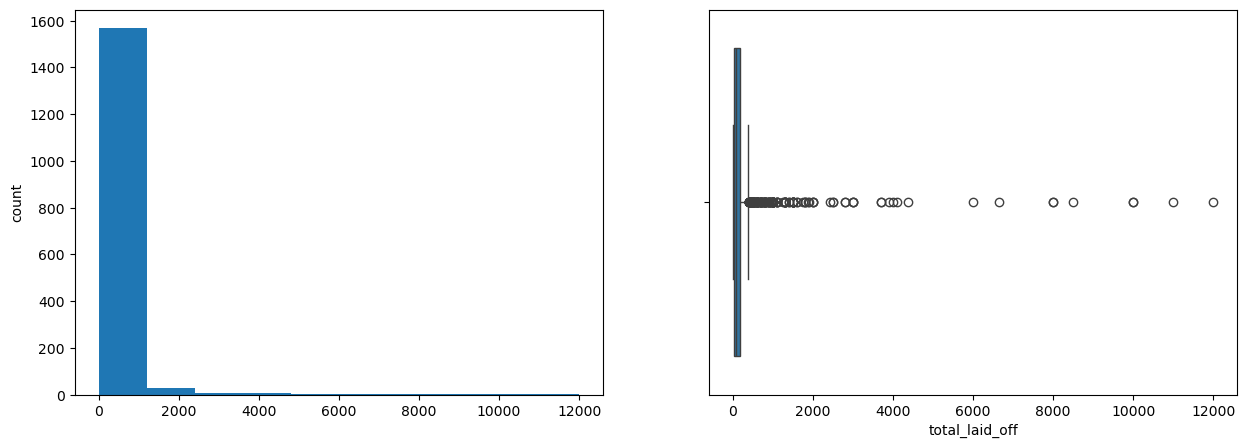

percentage_laid_off
Skew : 2.25


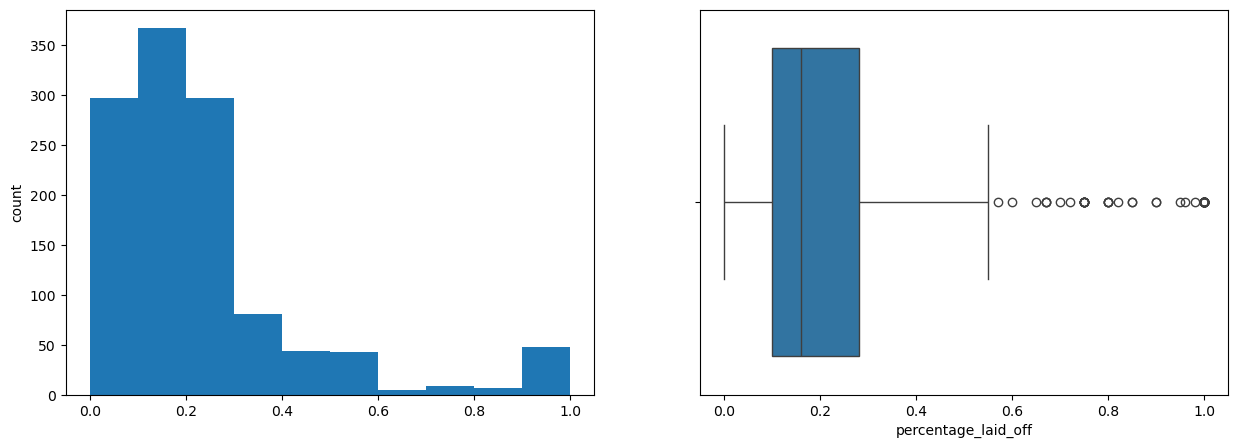

funds_raised_millions
Skew : 16.52


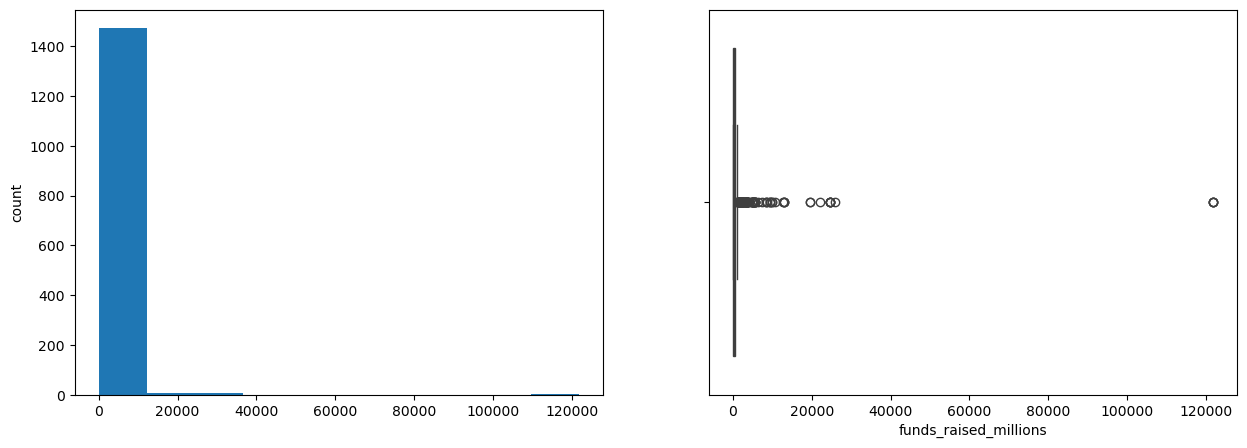

total_workforce
Skew : 13.67


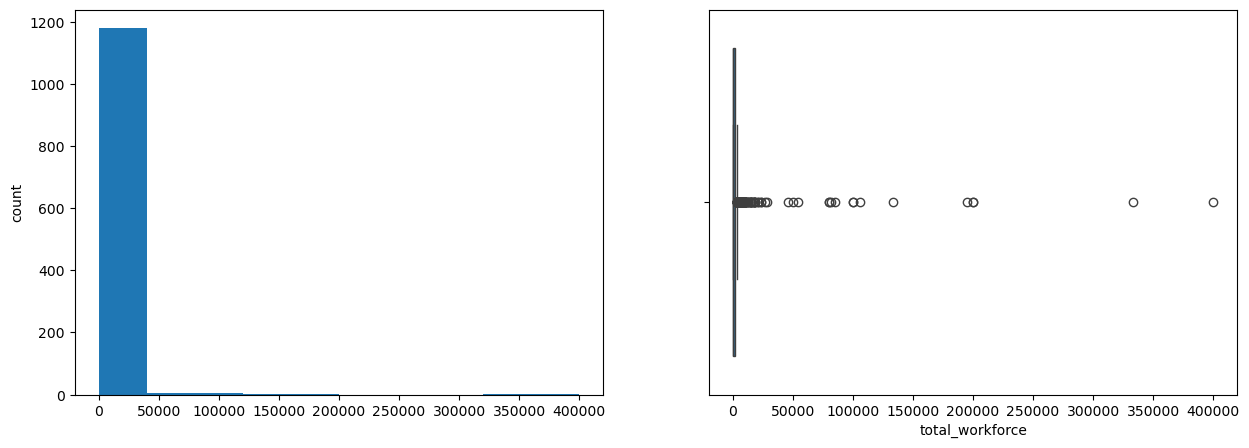

In [35]:
columns = ['total_laid_off', 'percentage_laid_off', 'funds_raised_millions', 'total_workforce']
cont_cols = columns
for col in cont_cols:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    #histogram
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observation_________**
<br> <br>
- **As noted earlier, the distributions are skewed due to the presence of very large values.**
- **The large variation in the dataset results in a lot of outliers. As can be seen, all the numeric values have outliers**

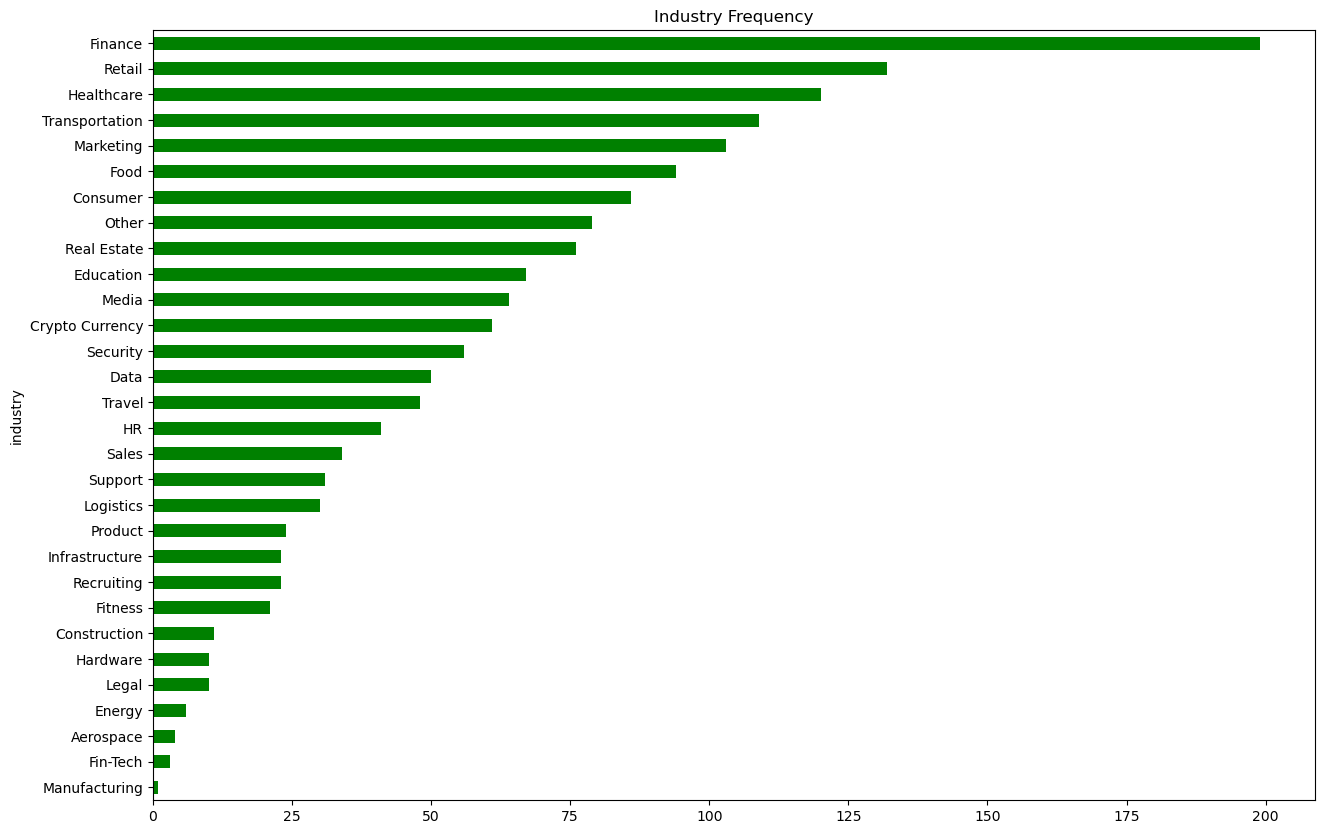

In [53]:
#visualizing industry count (frequency check)
data['industry'].value_counts().sort_values(ascending = True).plot(kind = 'barh', figsize = (15, 10), color = 'green')
plt.title('Industry Frequency')
plt.show()

**Observation_________**
<br> <br>
- Finance, Retail, Healthcare and transportation have the most occurrence in this dataset across all areas.
- Construction, Hardware, Legal, Energy, Aerospace, Fin-Tech and Manufacturing have the least occurrence. 



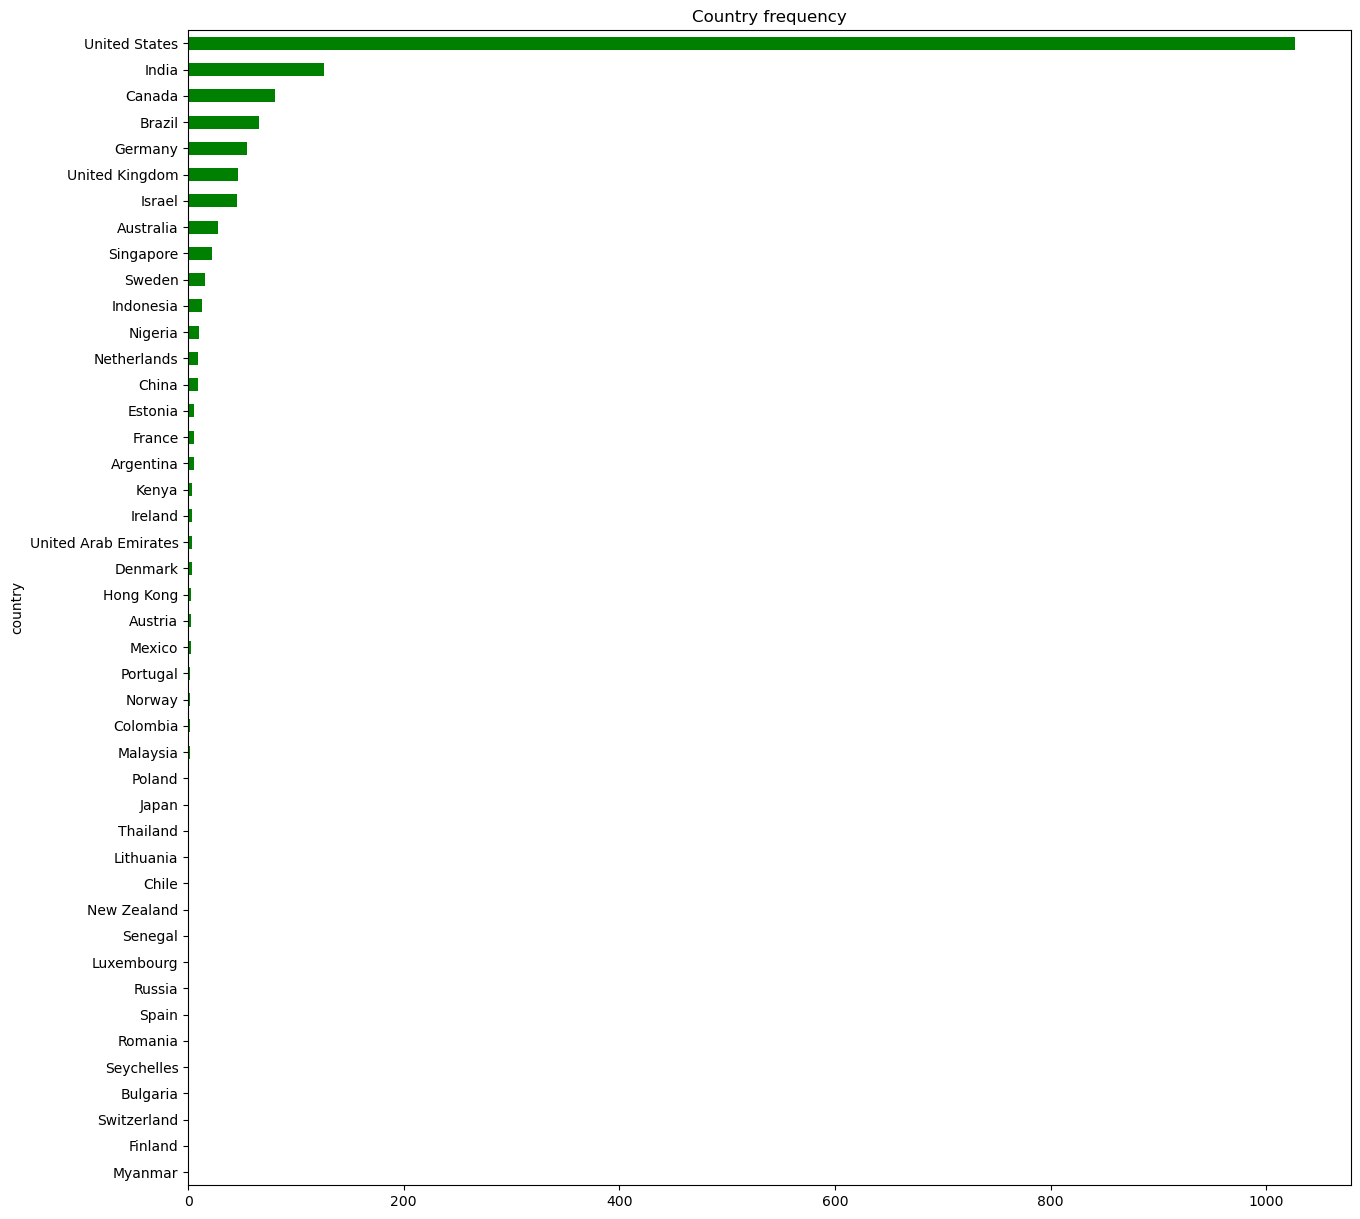

In [54]:
## country count (frequency check)
data['country'].value_counts().sort_values(ascending = True).plot(kind = 'barh', figsize = (15, 15), color = 'green', title = 'Country frequency')
plt.show()

**Observation_________**
<br> <br>
- **Most of the companies in this dataset are located in the United States and so majority of the layoffs will be within the United States.**
<br><br><br>

- **Earlier the top 5 layoff values according to company was looked at, however it can be observed that some companies appear more than once in this dataset. Aggregating the number of layoffs by company, let's see which company within the 3 year time period laid off the most people.**


### Aggregating layoffs by company

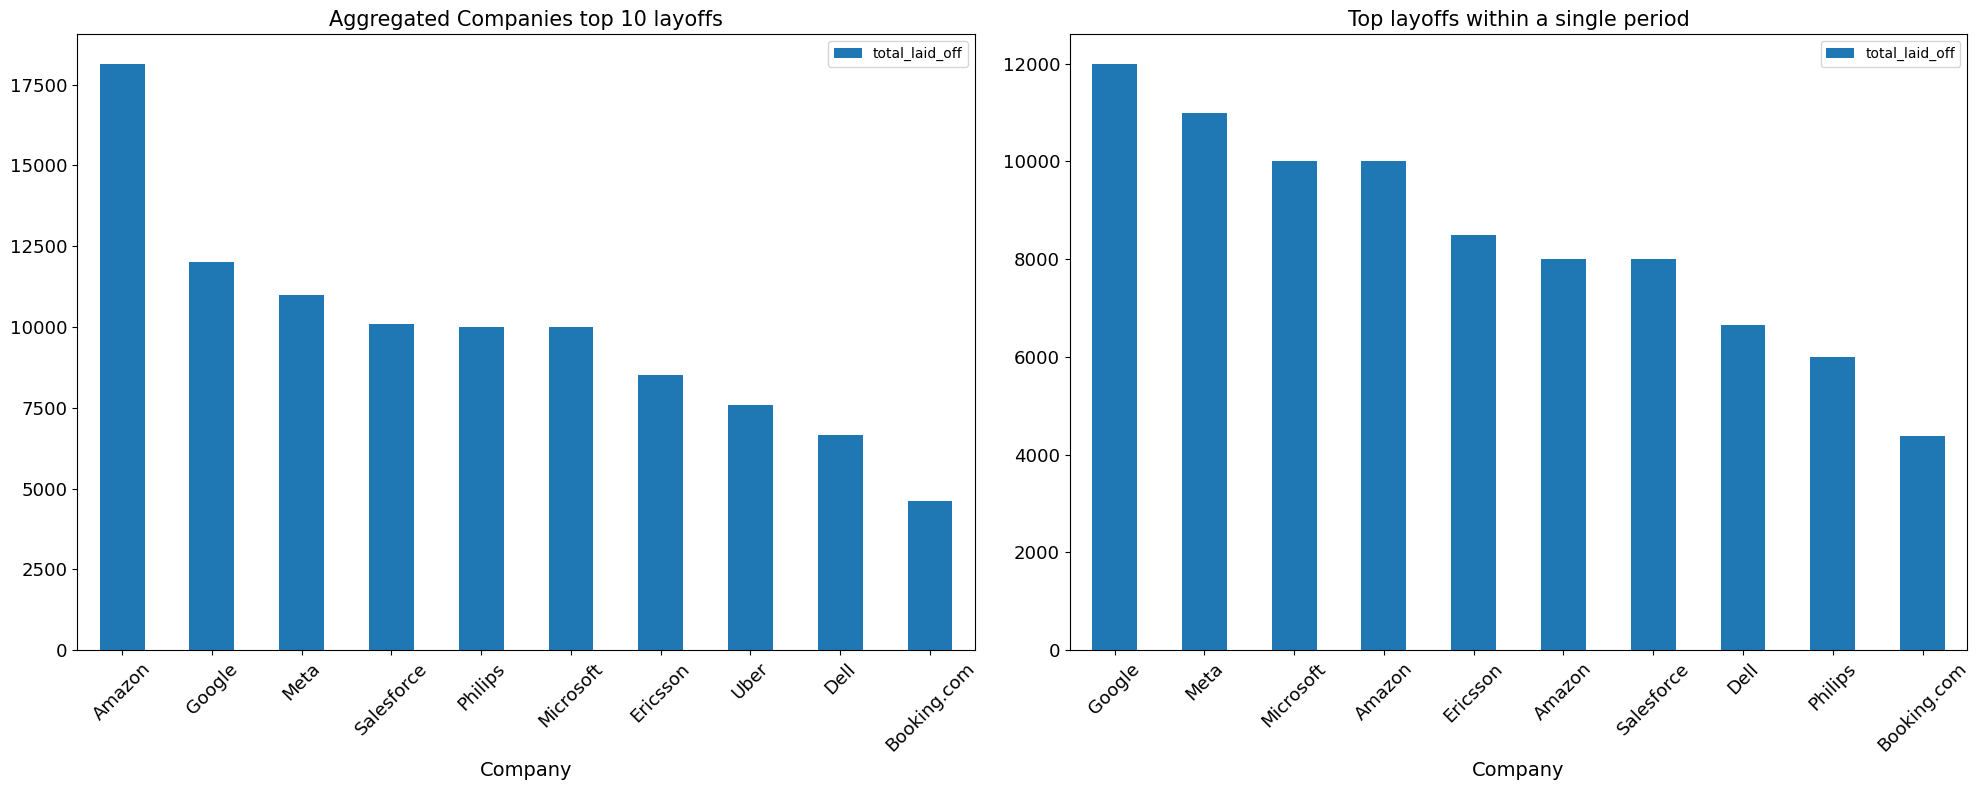

In [38]:
agg_company_layoff = (
    data[['company', 'industry', 'total_laid_off']]
    .groupby('company')
    .agg({'industry': 'first', 'total_laid_off': 'sum'})
    .sort_values(by='total_laid_off', ascending=False)
)

#creating subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))

#subplot 1
agg_company_layoff.head(10).plot(kind = 'bar', rot = 45, ax = ax1)
ax1.set_title('Aggregated Companies top 10 layoffs', fontsize = 15)

#subplot 2
high_layoffs[['company', 'total_laid_off']].sort_values(by='total_laid_off', ascending=False).plot(kind = 'bar', rot = 45, x = 'company', ax = ax2)
ax2.set_title('Top layoffs within a single period', fontsize = 15)

#adjusting font sizes
#for plot 1
ax1.tick_params(axis='x', labelsize=13)
ax1.tick_params(axis='y', labelsize=13)
#for plot 2
ax2.tick_params(axis='x', labelsize=13)
ax2.tick_params(axis='y', labelsize=13)

#adjusting x axis label size
ax1.set_xlabel('Company', fontsize=14)
ax2.set_xlabel('Company', fontsize=14)

plt.tight_layout()
plt.show()

**Observation_________**
<br> <br>

- The aggregated companies account for all time periods within the dataset. The top 5 companies are: Amazon, Google, Meta, Salesforce and Philips. 
- Top companies with the most layoffs at a single time have a sightly different ranking of companies.

## Bivariate Analysis

In [39]:
#Dropping the null date value to prevent visulization errors
data = data.dropna(subset=['date'])

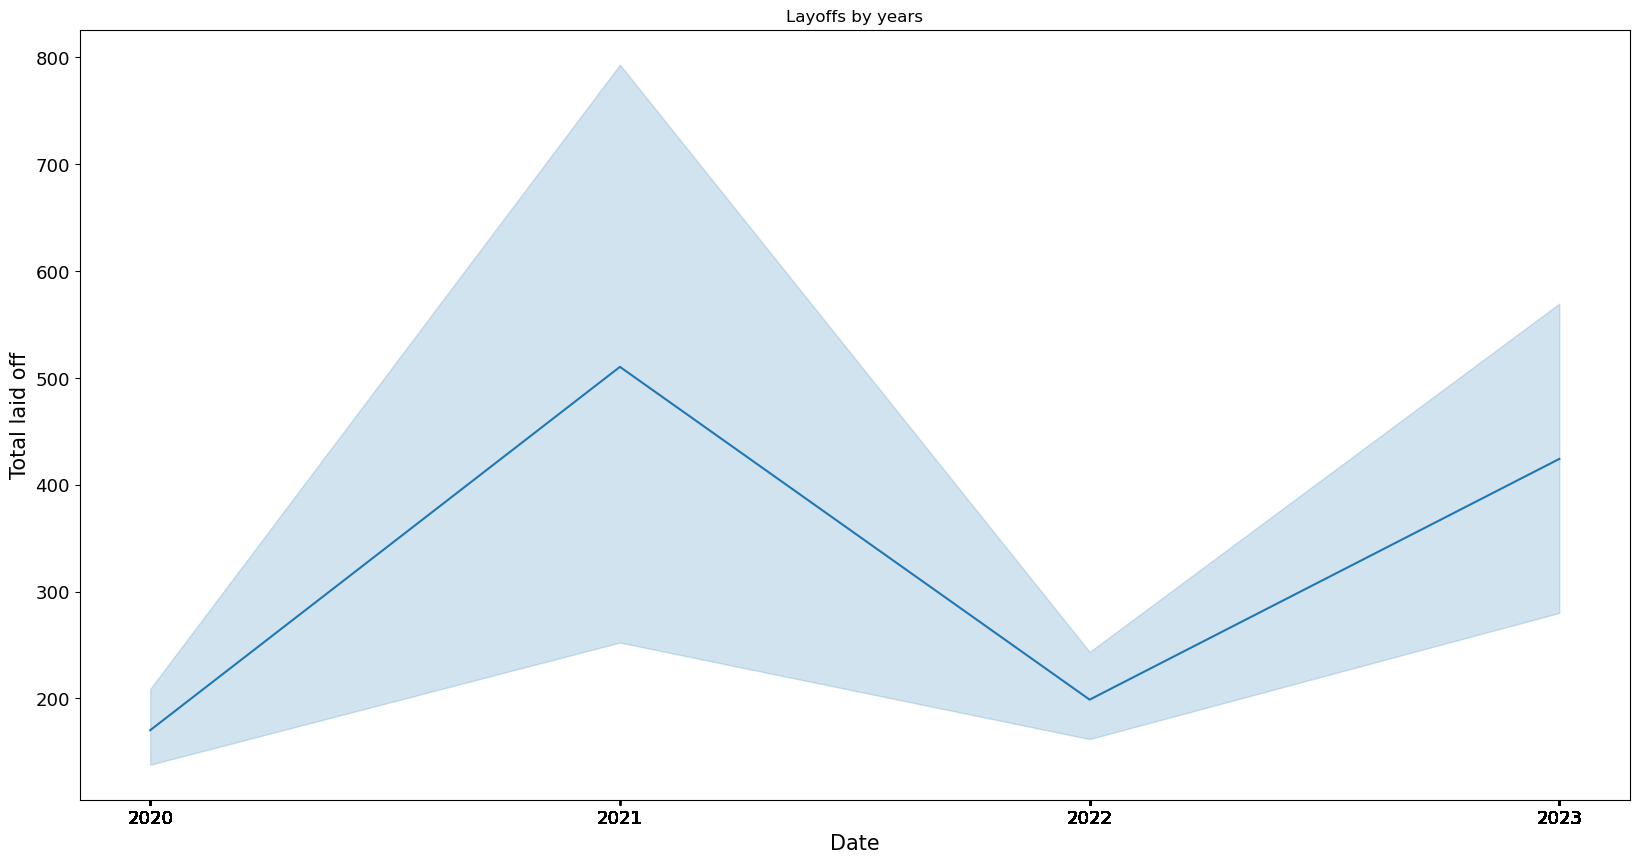

In [43]:
import matplotlib.dates as mdates
plt.figure(figsize=(20, 10))
sns.lineplot(x = data['date'].dt.year, y = 'total_laid_off', data = data)
plt.xticks(ticks = data['date'].dt.year, labels = data['date'].dt.year, fontsize = 13)
plt.yticks(ticks = None, labels = None, fontsize = 13)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Total laid off', fontsize = 15)
plt.title('Layoffs by years')
#plt.tight_layout()
plt.show()

**Observation_________**
<br> <br>
- **From 2020 layoffs steadily rise and peaks in 2021 at an approximate mean value of 500 layoffs (confidence in this value is at 95%).**
- **Layoffs then experience a downward trend from 2021 up to 2022 with an approximate minimum value 230 average layoffs.**
- **From 2022 layoffs increases all the way into 2023. Last observed value of 2023 set at an approximate mean value of 440 layoffs.**


- **Looking into the time frame in months for more detail.**

In [44]:
#creating a new column with year and month from the date column
data['year_month'] = data['date'].dt.strftime('%Y-%m')


In [45]:
#converting the new column into a datetime datatype
data['year_month'] = pd.to_datetime(data['year_month'], format='%Y-%m')


In [46]:
#viewing new column
data.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions,total_workforce,year_month
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,Post-IPO,Australia,210.0,10000,2023-03-01
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06,Post-IPO,United States,525.0,5938,2023-03-01
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06,Series B,Nigeria,16.0,<NA>,2023-03-01
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06,Unknown,India,631.0,<NA>,2023-03-01
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,Unknown,Brazil,788.0,2267,2023-03-01


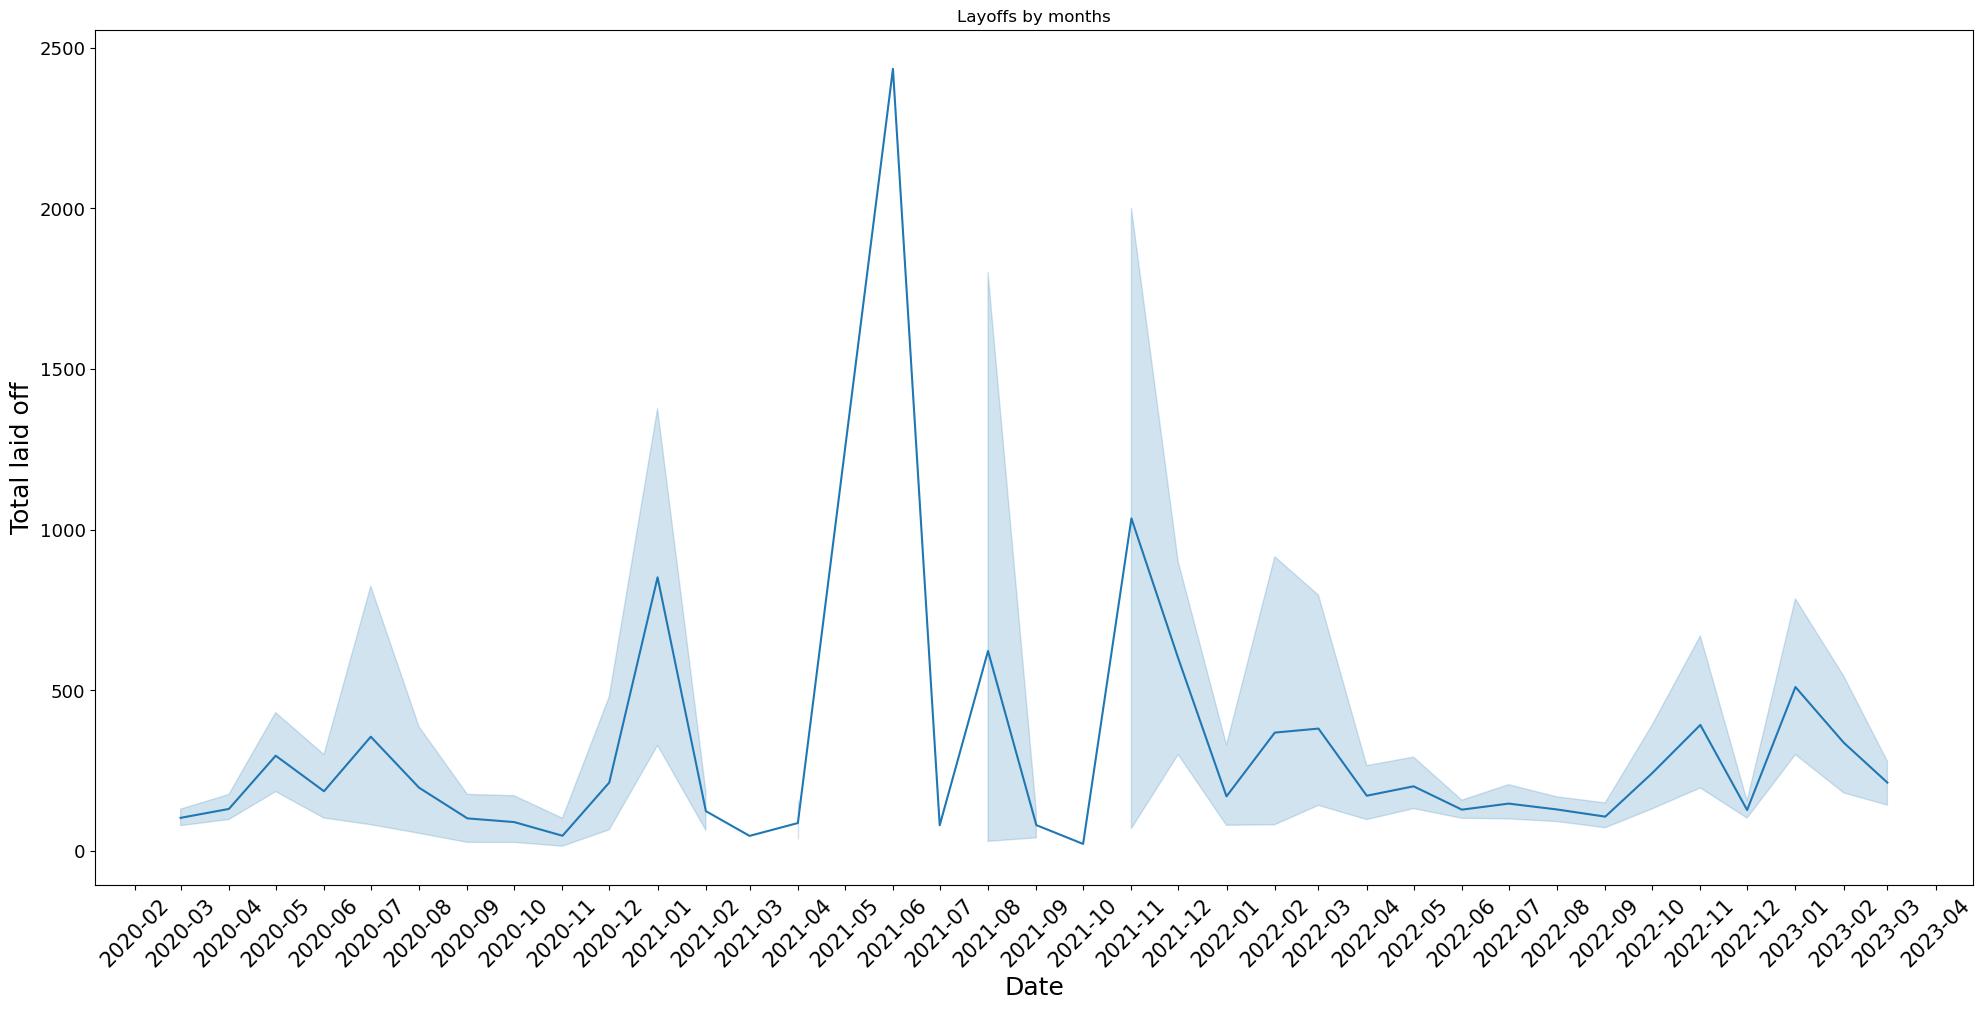

In [47]:
#plotting graph
plt.figure(figsize=(20, 10))
sns.lineplot(x = data['year_month'], y = 'total_laid_off', data = data)
plt.xticks(ticks = None, labels = None, rotation = 45, fontsize = 15)
plt.yticks(ticks = None, labels = None, fontsize = 13)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Total laid off', fontsize = 18)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.title('Layoffs by months')
plt.show()

**Observation_________**
<br> <br>
- **Here it can be observed in more detail that the peak amount of layoffs occurred around May 2021 with an average layoff value of 2480 layoffs.**
- **Layoffs are especially low through-out 2022 compared to other years.**

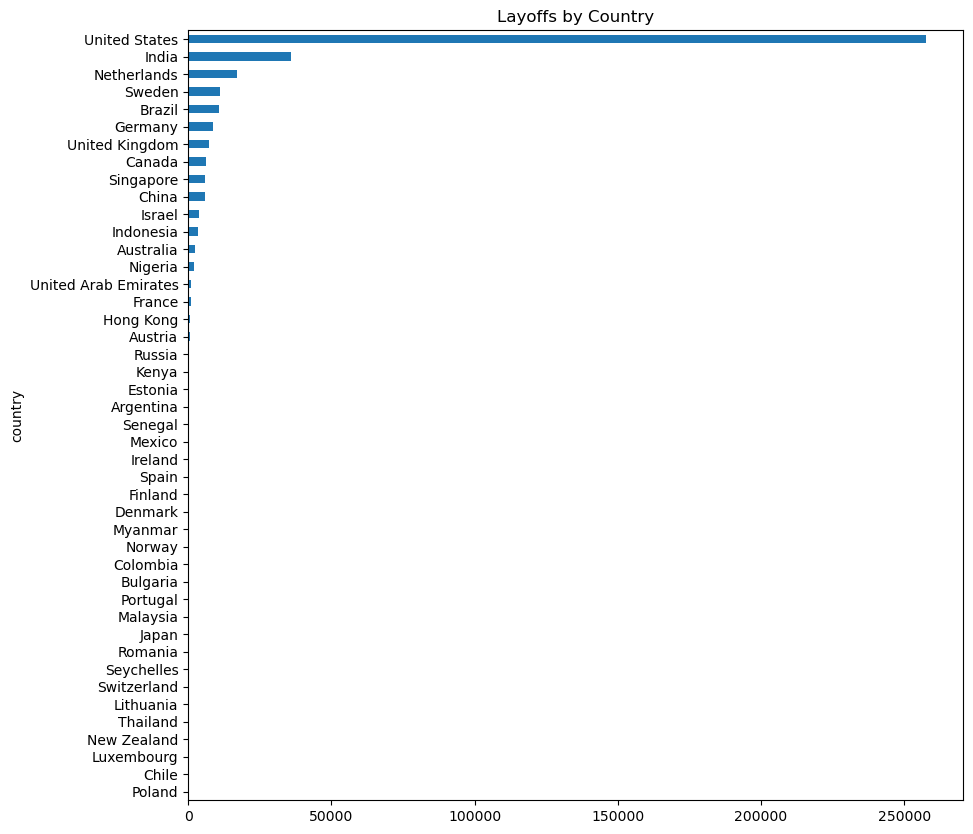

In [48]:
#layoffs by country
ordered_countries = data.sort_values(by = 'total_laid_off', ascending=False)

plt.figure(figsize = (10,10))
ordered_countries.groupby('country')['total_laid_off'].sum().sort_values(ascending = True).plot(kind = 'barh')
#plt.grid(True)
plt.title('Layoffs by Country')
plt.show()

**Observation_________**
<br> <br>
- **United States has the highest number of layoff, approximately 250,000 (which is an approximate percentage increase of over 600% compared to India). However, this high number is also due to the high frequency of companies located in the United states. It does not mean that the United states had a worse economic situation as compared to other countries.**
<br> <br>
- Other countries with high layoffs include: India, Netherlands, Sweden

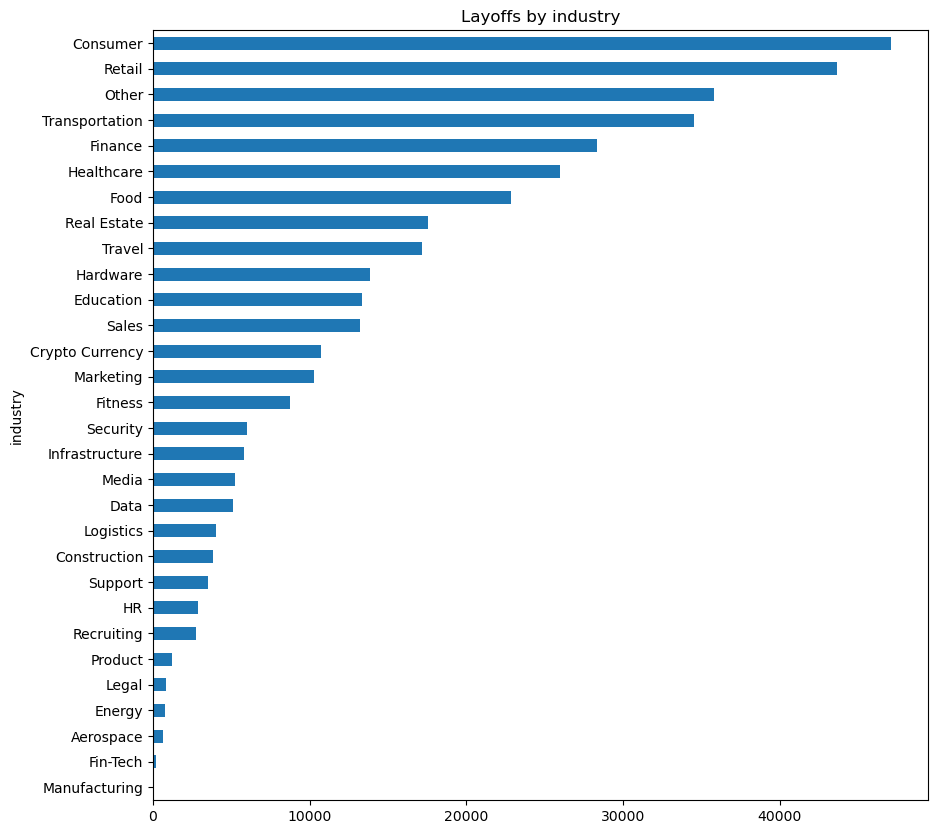

In [49]:
#layoffs by industry
ordered_countries = data.sort_values(by = 'total_laid_off', ascending=False)

plt.figure(figsize = (10,10))
ordered_countries.groupby('industry')['total_laid_off'].sum().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Layoffs by industry')
plt.show()

**Observation_________**
<br> <br>
- The top 5 highest number of layoffs by industry in decreasing order is: consumer, retail, transportation and finance

### Multivariate Analysis

In [51]:
#function take in country name as string and returns the layoffs by industry in descending order 
#as well as the locations within the country with the highest layoffs
def country_industry_layoff(intake):
    grouping = data.groupby(['country', 'industry'])['total_laid_off'].sum().reset_index()
    grouping = grouping.sort_values(by = ['country', 'total_laid_off'], ascending= True)
    
    
    location_country_layoffs = data.groupby(['country', 'location'])['total_laid_off'].sum().reset_index()
    location_country_layoffs = location_country_layoffs.sort_values(by = ['country', 'total_laid_off'], ascending= False)


    #subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
    
    print(intake)
    location_country_layoffs[location_country_layoffs['country'] == intake].head(10).plot(kind='bar', x = 'location', 
                                                                                          ylabel = 'total_laid_off', 
                                                                                          xlabel = 'location',
                                                                                          figsize = (20, 8), 
                                                                                          rot = 45, ax=ax2, 
                                                                                          color = 'purple', 
                                                                                          title = 'Country Layoffs Grouped By Location')
    
    
    intake, grouping[grouping['country'] == intake].plot(kind='barh', x = 'industry', ylabel = 'total_laid_off',
                                                         xlabel = 'industry', figsize = (20, 8), 
                                                         ax=ax1, title = 'Country Layoffs Grouped By Industry')
    
    #adjusting the label sizes
    #subplot 1
    ax1.tick_params(axis='x', labelsize=13)
    ax1.tick_params(axis='y', labelsize=13)
    
    #subplot 2
    ax2.tick_params(axis='x', labelsize=13)
    ax2.tick_params(axis='y', labelsize=13)

    #adjusting x axis label size
    ax1.set_xlabel('Company', fontsize=14)
    ax2.set_xlabel('Company', fontsize=14)
    
    
    plt.tight_layout()

United States


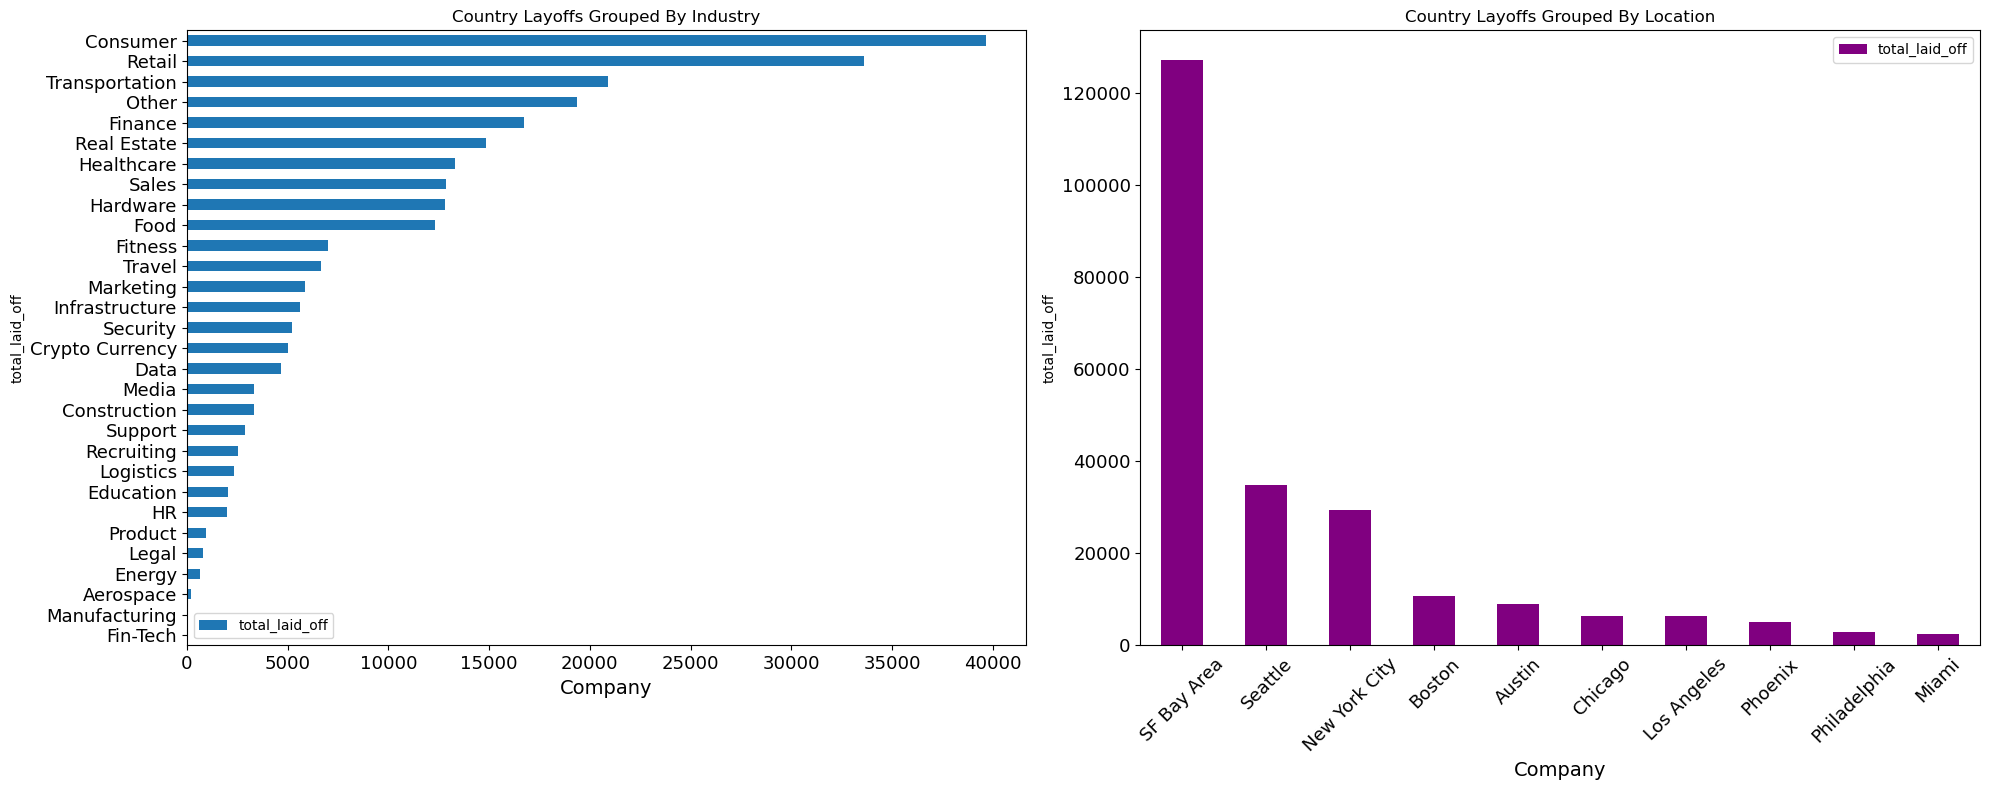

In [52]:
#calling the function
country_industry_layoff('United States')
plt.show()

India


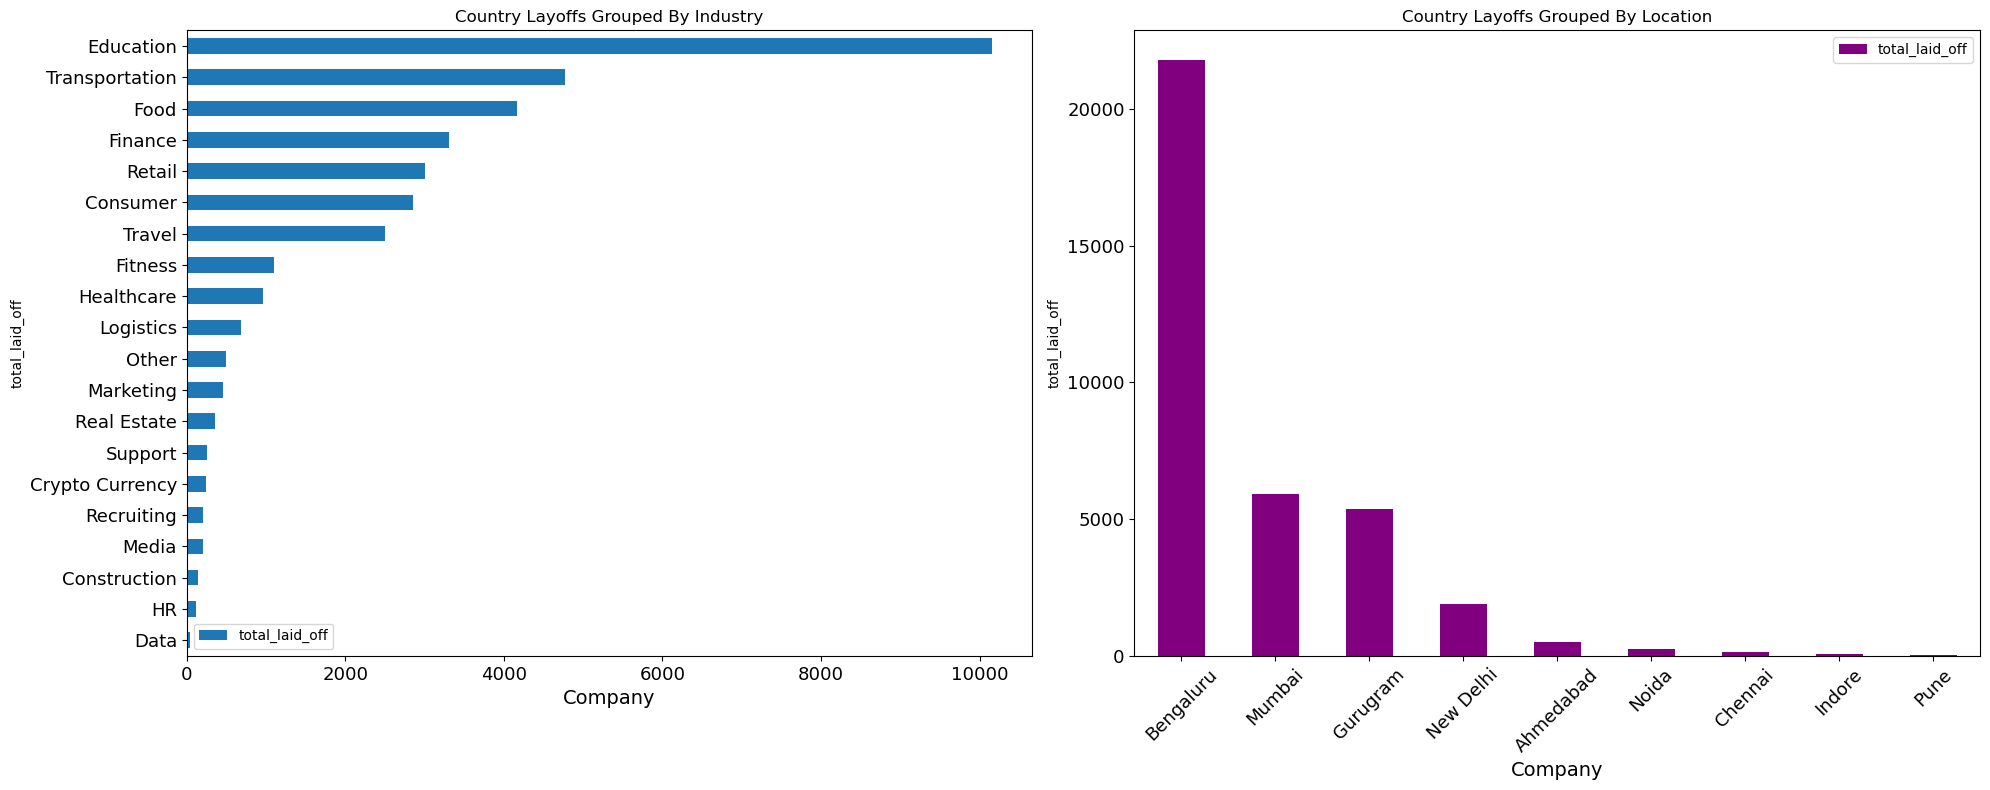

In [53]:
#calling the function
country_industry_layoff('India')
plt.show()

United Kingdom


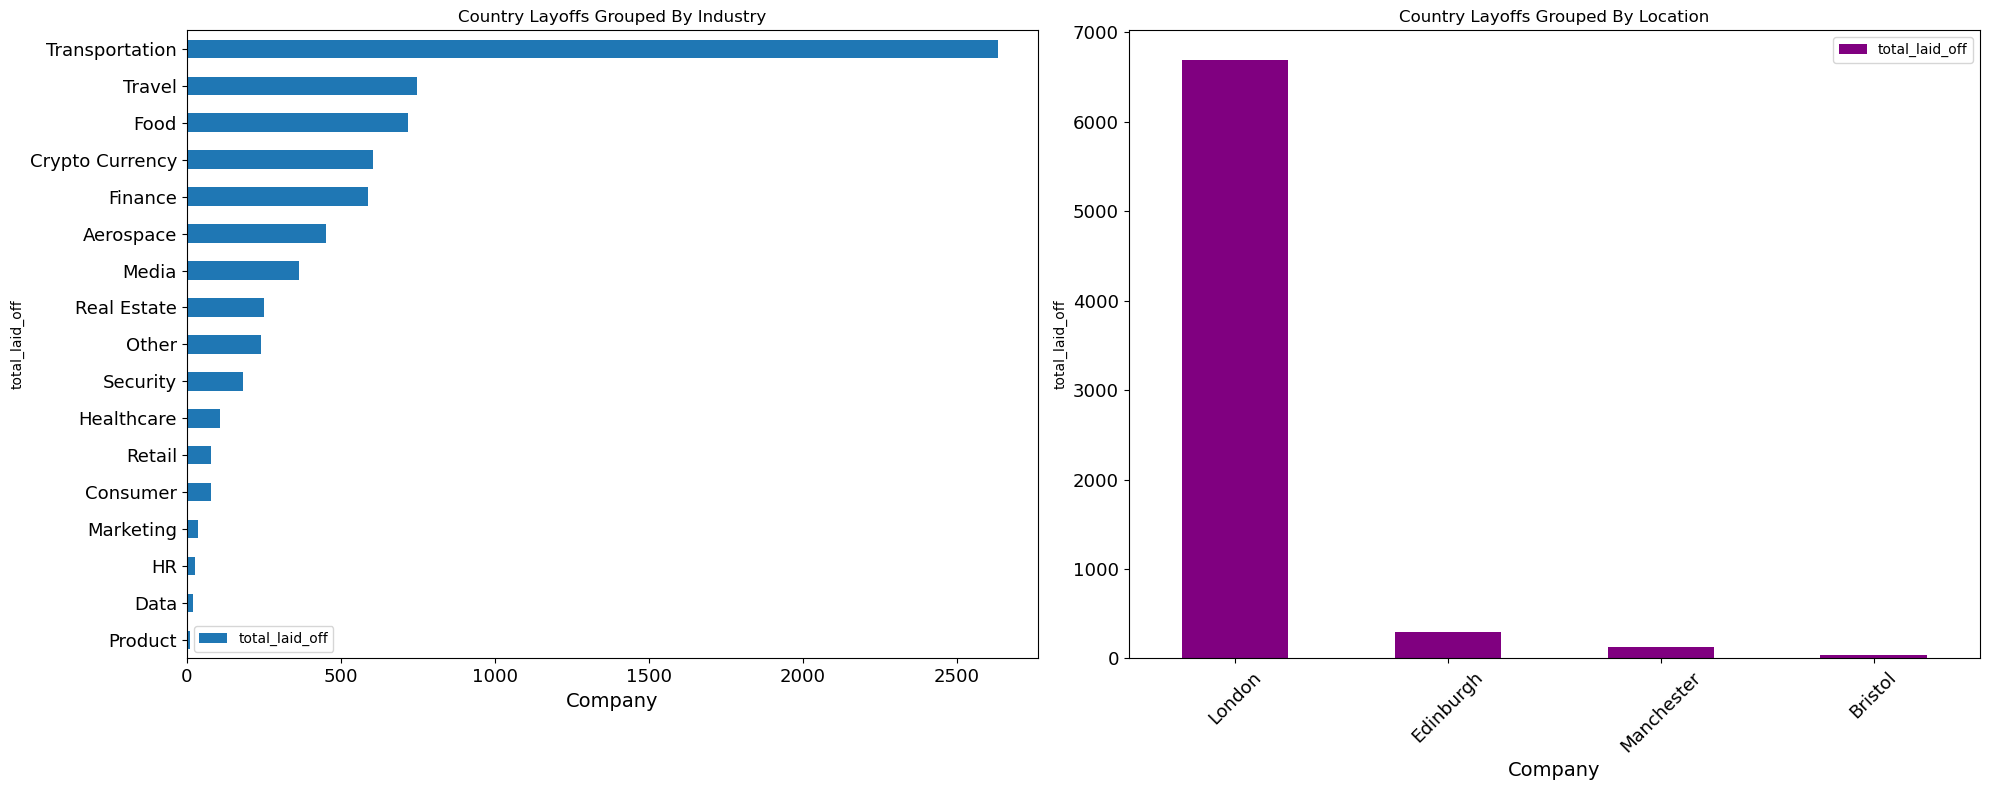

In [54]:
country_industry_layoff('United Kingdom')
plt.show()

Nigeria


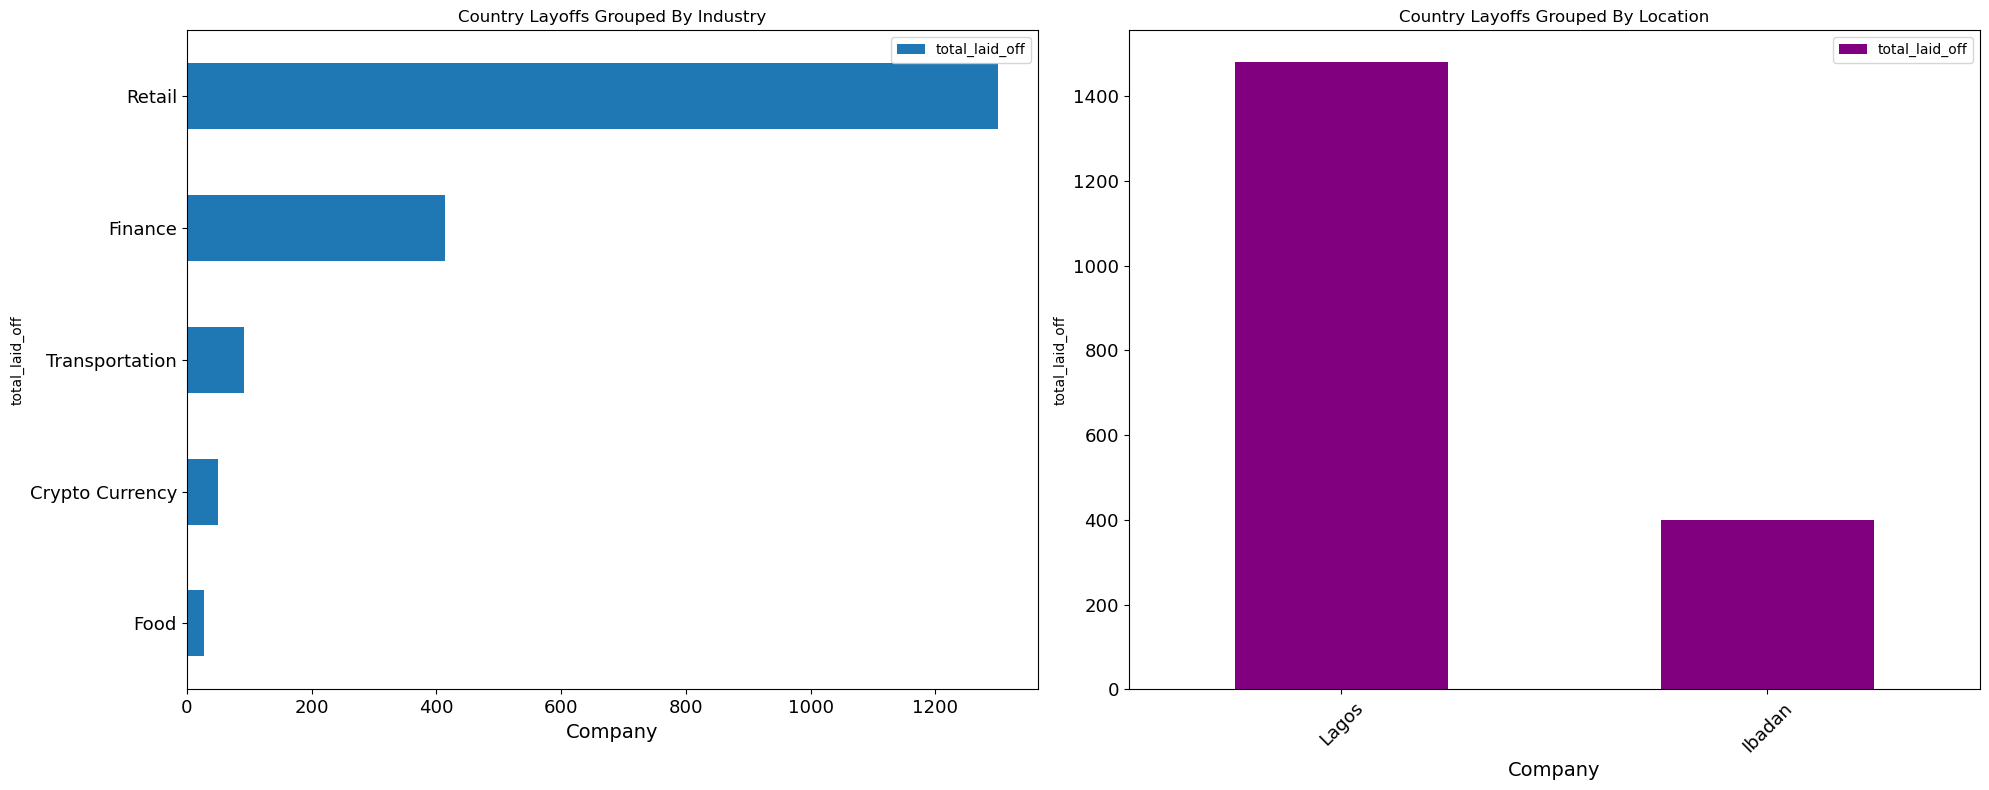

In [55]:
country_industry_layoff('Nigeria')
plt.show()

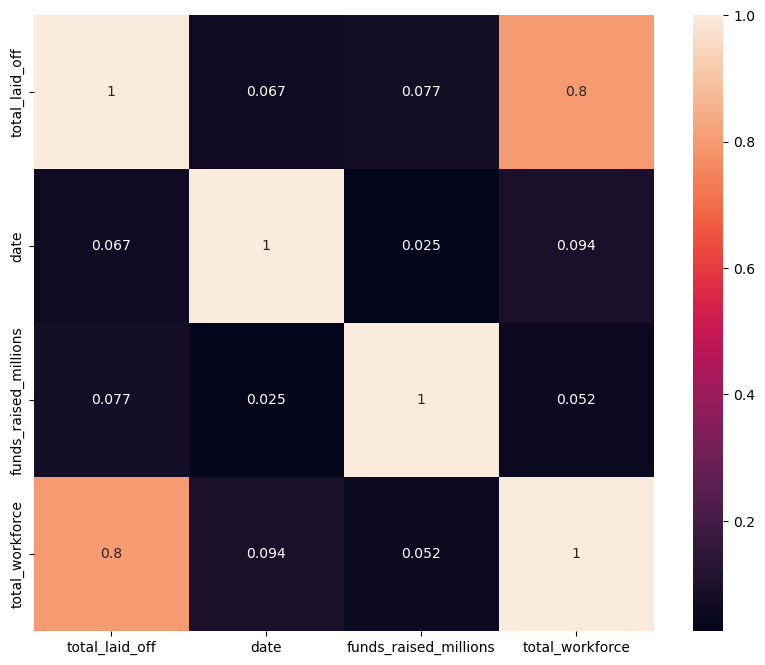

In [56]:
corr = data[['total_laid_off', 'date', 'funds_raised_millions', 'total_workforce']].corr()

plt.figure(figsize = (10,8))
sns.heatmap(data = corr, annot = True)
plt.show()

**The only correlation that exist is between total_workforce and total_laid off. The greater a company's workforce the more layoffs were processed.**